# Cálculo integral

Advertencia :

¡¡ este archivo no quiere reemplazar a ninguna clase en cualquiera de sus modalidades presenciales, ni virtuales
tampoco ningún trabajo practico, ejercicio ni parcial o examen !!

Simplemente es otro punto de vista del conocimiento con la aplicación de una nueva herramienta.

## Contenido 

### 1. Introducción


#### a. Interpretación geométrica  
#### b. Teoremas fundamentales 
#### c. Integral definida
#### d. Integral indefinida

### 2. Métodos de integración  

#### a. Integral por sustitución
#### b. Intregral definida por fracciones
#### c. Integral por partes

### 3. Integrales impropias 

### 4. Integrales dobles

### 5. Integrales triples

#### a. Coordenadas cilíndricas 
#### b. Coordenadas esféricas

### 6. Aplicaciones

#### a. Geometría
#### b. Fuerzas distribuidas
#### c. Estadística

### 7. Linealidad

### Librerías 

In [2]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d

### versiones

In [3]:
import sympy as sym
sym.__version__

'1.5.1'

In [4]:
np.__version__

'1.18.1'

In [5]:
import matplotlib as mtl
mtl.__version__

'3.1.3'

# 1. Introducción 

recordamos de AM I ...

mientras la derivada habla de la recta tangente de una función (como cambia un variable respecto a otra)
la integral se interpreta como el área que limita con una función

comenzando con el concepto de antiderivada $F(x)$ es la primitiva  de la función $f(x)$ en un intervalo, si $ F'(x) = f(x) $


también se tienen una constante arbitraria dado que la derivada de un constante sea cero 
$  \frac{d}{dx} C  = 0  \Rightarrow  \int dx = x + C $ 

Entonces ...

$ \int f(x) dx = F(x) + C$

se habla de una familia de curvas primitivas.


### a. Interpretacion geometria 

función $f(x)$ continua en un intervalo cerrado $[a,b]$ y $ f(x)\geq 0 $ en el intervalo.  

Dividimos el intervalo en partes iguales $\Delta x$
y las multiplicamos por $f(x_i)$  tenemos $n$ rectángulos de área  $f(x_i) \Delta x$ . 

Si hacemos que $\Delta x$ sea un valor muy pequeño, el rectángulo se hace fino en intervalo.

La suma de todos esos rectángulos es el área debajo de la función, su integral ... por eso su símbolo es un s estirada. 

$ A = \displaystyle \lim_{ \Delta x \to 0} \sum_{i=1}^{n} {f(x_i) \Delta x }  = \int_{a}^{b} f(x) dx $


se puede extender esta interpretacion, si para $f(x_i)$ usamos el menor valor de $\Delta x$ serán rectángulos inscritos y con el mayor valor de $\Delta x$ tendremos rectángulos circunscritos.


$\displaystyle \lim_{\Delta x \to 0} \sum_{i=1}^{n} {f(x_{inf}) \Delta x }  \leq \int_{a}^{b} f(x) dx \leq \lim_{\Delta x \to 0} \sum_{i=1}^{n} {f(x_{sup}) \Delta x } $


Ojo, ya que el área está delimitada por $ y_s=f(x) , y_i=0$ (arriba y abajo) y $ x=a , x=b $  (izquierda y derecha)

Algo interesante es que si la función $ f(x)\leq 0 $ la integral dará un resultado negativo

Las integrales se pueden simplificar si ...

la función es par $f(x) = f(-x) \Rightarrow \int _{a}^{b} f(x) dx = 2 \int _{0}^{b} f(x) dx $ hay simetría respecto al eje $y$ 

ó si la función es impar $f(-x) = - f(x) \Rightarrow \int _{-a}^{a} f(x) dx = 0$

In [6]:
# ejemplo con rectángulos inscritos

def f(x):
    # x**2
    #(x-3)*(x-5)*(x-7) + 80
    
    return 0.5*x**2 + np.sin(10* x)

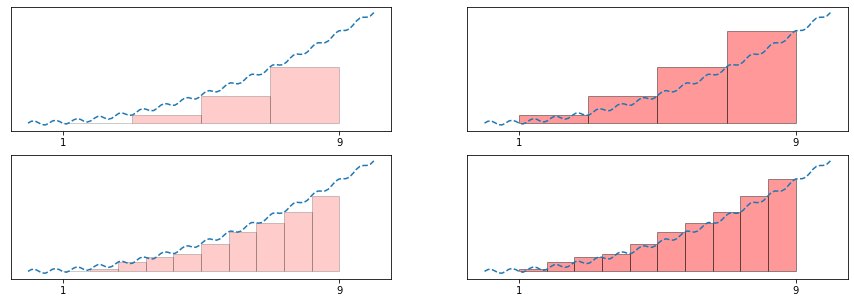

In [7]:
x = np.linspace(0, 10, 100)
y = f(x)

a,b = 1,9

n1 , n2 = 4,10 # 4,8
w1, w2 = (b-a)/n1 , (b-a)/n2

plt.figure(figsize=(15,5))

### con x_inf ###
#################

plt.subplot(221)

x_bar = np.linspace(a , b-w1, n1)
y_bar = f(x_bar)

plt.plot(x, y, ls='--')
plt.bar(x_bar, y_bar, width=w1, align='edge', alpha=0.2, color='r', ec='black')
plt.xticks((a, b))
plt.yticks([])

plt.subplot(223)

x_bar = np.linspace(a , b-w2, n2)
y_bar = f(x_bar)

plt.plot(x, y, ls='--')
plt.bar(x_bar, y_bar, width=w2, align='edge', alpha=0.2, color='r', ec='black')
plt.xticks((a, b))
plt.yticks([])

### con x_sup ###
#################

plt.subplot(222)

x_bar = np.linspace(a , b-w1, n1)
x_sup = np.linspace(a+w1, b, n1)
y_bar = f(x_sup)

plt.plot(x, y, ls='--')
plt.bar(x_bar, y_bar, width=w1, align='edge', alpha=0.4, color='r', ec='black')
plt.xticks((a, b))
plt.yticks([])


plt.subplot(224)

x_bar = np.linspace(a , b-w2, n2)
x_sup = np.linspace(a+w2, b, n2)
y_bar = f(x_sup)

plt.plot(x, y, ls='--')
plt.bar(x_bar, y_bar, width=w2, align='edge', alpha=0.4, color='r', ec='black')
plt.xticks((a, b))
plt.yticks([])


plt.show()

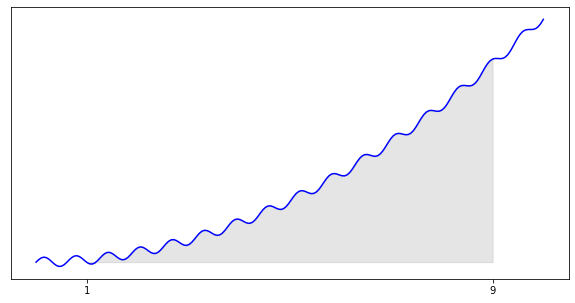

In [8]:
# función 
x = np.linspace(0 , 10, 200)
y = f(x)

# área a calcular 
a, b = 1, 9
x_area = np.linspace(a,b,200)
y_area = f(x_area) 

# grafico
plt.figure(figsize=(10,5))

plt.plot(x, y, color='b')
plt.fill_between( x_area,0, y_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.yticks([])
plt.show()         

### b.Teoremas fundamentales del cálculo integral 

Estos teoremas relacionan el cálculo diferencial y el cálculo integral

Primer teorema

Sea $f(x)$ una función es continua en el intervalo cerrado $[a,b]$

Si $F(x)$ es una función definida como $ F(x) =\displaystyle \int_{a}^{x} f(t) dt   $

Entonces ... 

$$\displaystyle F'(x)=f(x) \Leftrightarrow \frac{d}{dx} \int _{a}^{x} f(t)dt =f(x)  $$

$\,$

Segundo teorema

Sea $f(x)$ una función es continua en el intervalo cerrado $[a,b]$ y 
sea función $F(x)$ tal que $F'(x)=f(x)$  

Entonces para toda $x$ en $[a,b]$ ...

$$\displaystyle \int_{a}^{b} f(x) dx = F(a) - F(b)   $$



Con la regla de la cadena podemos extender este teorema si $a = a(x)$ y $b = b(x)$

$$\frac{d}{dx} \int _{a(x)}^{b(x)} f(t)dt = f(b(x)) \cdot b'(x) - f(a(x)) \cdot a'(x)  $$



### c. Integral definida

tiene límites de integración  y retorna un valor numérico

$\displaystyle \int_{a}^{b} f(x) dx = F(b) - F(a)$



In [9]:
x = Symbol('x')
f = x**2
f

x**2

In [10]:
F = Integral(f, (x,0,2))
F

Integral(x**2, (x, 0, 2))

In [11]:
F.doit()

8/3

In [12]:
integrate(f,(x,0,2) ) 

8/3

### d. Integral indefinida

No tiene límites de integración y retorna una función

$\displaystyle \int f(x) dx = F(x) + C$


$\textit{Regla de la cadena para la integración } $

$\displaystyle \int f(g(x)) g'(x) dx = F(g(x)) + C$


In [13]:
x = Symbol('x')
f = x**2
f

x**2

In [14]:
F = Integral(f)
F

Integral(x**2, x)

In [15]:
F.doit()

x**3/3

In [16]:
# sympy no recnoce la constante de integración 
integrate(f) 

x**3/3

In [17]:
# le podemos agregar la constante
c = symbols("c")

F.doit() + c

c + x**3/3

# 2. Metodos de integración

### a. Integral por sustitución 

In [18]:
### sustitucion

x = Symbol('x')
f = x*sqrt(1+x)
f

x*sqrt(x + 1)

In [19]:
F = Integral(f, x)
F

Integral(x*sqrt(x + 1), x)

In [20]:
u = Symbol('u')

F.transform( sqrt(1+x) , u)

Integral(2*u*(u**2 - 1)*sqrt(u**2), u)

In [21]:
# integral indefinida sin C
I = F.transform( sqrt(1+x) , u).doit()
I

2*(u**2)**(5/2)/5 - 2*(u**2)**(3/2)/3

In [22]:
# integral con límites (definida)
F = Integral(f, (x,0,3))
F

Integral(x*sqrt(x + 1), (x, 0, 3))

In [23]:
# la misma integral con sustitución
u = Symbol('u')

F.transform( sqrt(1+x) , u)

Integral(2*u*(u**2 - 1)*sqrt(u**2), (u, 1, 2))

In [24]:
F.transform( sqrt(1+x) , u).doit()

116/15

In [25]:
# integral indefinida pero con la función sin sustitución

Integral(f,x).doit()

2*x**2*sqrt(x + 1)/5 + 2*x*sqrt(x + 1)/15 - 4*sqrt(x + 1)/15

In [26]:
F = Integral(f, (x,0,3))
F

Integral(x*sqrt(x + 1), (x, 0, 3))

In [27]:
F.doit()

116/15

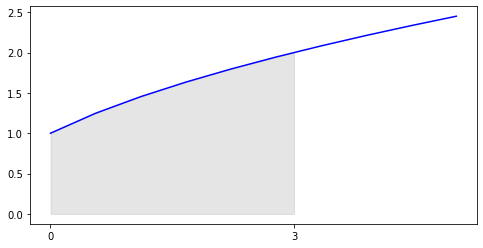

In [28]:
# función 
x = np.linspace(0 , 5, 10)
y = np.sqrt(1+x)

# área a calcular 
a, b = 0, 3
x_area = np.linspace(a,b,10)
y_area = np.sqrt(1+x_area)

# grafico
plt.figure(figsize=(8,4))

plt.plot(x, y, color='b')
plt.fill_between( x_area,0, y_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.show()         

###  b. Intregral definida por fracciones fracciones 

la integral se descompone en fracciones simples.

si tenemos una función racional tal que el grado de P(x) sea menor al de Q(x) ...$\frac{P(x)}{Q(x)} $ 

se descompone la función $ Q(x) = (x-a)(x-b)(x-c) $

$\frac{P(x)}{Q(x)}  = \frac{A}{x-a} + \frac{B}{x-b} + \frac{C}{x-c} $


In [29]:
x = Symbol('x')
f = (5*x +3)/(x**2 + 2*x -3)
f

(5*x + 3)/(x**2 + 2*x - 3)

In [30]:
F = Integral(f)
F

Integral((5*x + 3)/(x**2 + 2*x - 3), x)

In [31]:
# sympy no reconoce que los ln deben ser con valor absoluto
F.doit()

2*log(x - 1) + 3*log(x + 3)

### c. Integral por partes 

se utiliza la regla de la cadena del cálculo diferencial con dos funciones $u(x)$ y $v(x)$

$u(x) \cdot v(x) = u'(x) \cdot v(x) + u(x) \cdot v'(x) $

$u \cdot v = v \cdot \frac{du}{dx} + u \cdot \frac {dv}{dx} $


$u \cdot v - v \cdot \frac{du}{dx}  =  u \cdot \frac {dv}{dx} $

$ \int  u \cdot \frac {dv}{dx} =u \cdot v -\int  v \cdot \frac{du}{dx}  $



In [32]:
x = Symbol('x')
f = (ln(x))/(x**2)
f

log(x)/x**2

In [33]:
integrate(f)

-log(x)/x - 1/x

# 3. Integrales impropias 

1er especie $ \int_{a}^{ + \infty}f(x)dx $ ó $ \int_{- \infty}^{b}f(x)dx $ 

2da especie $ \int_{a}^{ b}f(x)dx $ pero la función no esta definida para todo el intervalo $[a,b]$ hay un punto singular

3ra especie es la combinación de la 1er especie con la 2da especie


Para este tipo de integrales se aplica el límite en uno de sus extremos, si existe el límite se dice que la integral converge, por lo contrario si el límite tiende a infinito ó no existe la integral diverge

In [34]:
# 1er especie 

x = symbols('x')
f = 1/((x+1)*sqrt(x))
f

1/(sqrt(x)*(x + 1))

In [35]:
# sympy reconoce una integral que en un extremo no puede ser evaluada, solo puede aplicarse le el límite al extremo

F = Integral(f,(x,0, +oo))
F

Integral(1/(sqrt(x)*(x + 1)), (x, 0, oo))

In [36]:
F.doit()

pi

In [37]:
integrate(f)

2*atan(sqrt(x))

In [38]:
F_l = integrate(f)

Limit(F_l,x, 0)

Limit(2*atan(sqrt(x)), x, 0)

In [39]:
limit(F_l,x, 0)

0

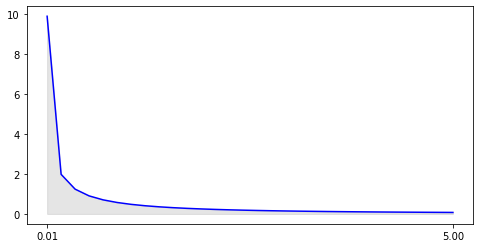

In [40]:
# función 
x = np.linspace(0.01 , 5, 30)
y = 1/((x+1)*np.sqrt(x))

# área a calcular 
a, b = 0.01, 5
x_area = np.linspace(a,b,30)
y_area = 1/((x+1)*np.sqrt(x))

# grafico
plt.figure(figsize=(8,4))

plt.plot(x, y, color='b')
plt.fill_between( x_area,0, y_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.show()          

In [41]:
#2da especie

x = symbols('x')
f = 1/root((x**2),3)
f

(x**2)**(-1/3)

In [42]:
F = Integral(f, (x,-1,1))
F

Integral((x**2)**(-1/3), (x, -1, 1))

In [43]:
F.doit()

6

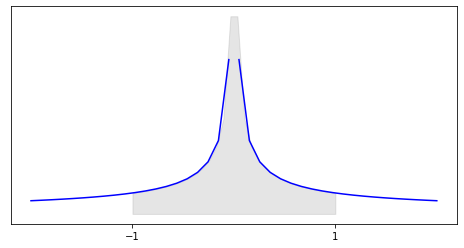

In [44]:
# función partida

x1 = np.linspace(-2 ,-0.05 , 20) 
y1 = 1/(np.abs(x1)**(2/3))

x2 = np.linspace(0.05 ,2 , 20)
y2 = 1/(np.abs (x2)**(2/3))

x = np.concatenate((x1,x2), axis=0)
y = 1/(np.abs(x)**(2/3))

# área a calcular desde -1 a 1 
a, b = -1, 1
x_area = np.linspace(a,b,30)
y_area =  1/(np.abs(x_area)**(2/3))

# gráfico
plt.figure(figsize=(8,4))

plt.plot(x1, y1, color='b')
plt.plot(x2, y2, color='b')
plt.fill_between( x_area,0, y_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.yticks([])

plt.show()

In [45]:
## Integral no convergente

x = symbols('x')
f = 3/(x)
f

3/x

In [46]:
F = Integral(f,(x,E, +oo))
F

Integral(3/x, (x, E, oo))

In [47]:
# integral no tiene un valor numérico, se dice que diverge
F.doit()

oo

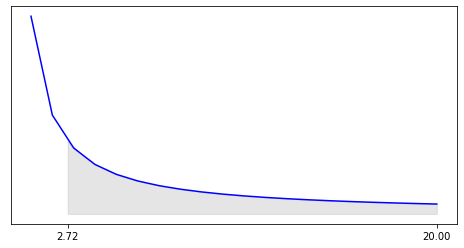

In [48]:
# función 
x = np.linspace(1, 20, 20)
y = 3/x

# área a calcular 
a, b = np.e, 20
x_area = np.linspace(a,b,20)
y_area = 3/x_area 

# gráfico
plt.figure(figsize=(8,4))

plt.plot(x, y, color='b')
plt.fill_between( x_area,0, y_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.yticks([])
plt.show()         

# 4. Integrales dobles

Hasta ahora las regiones a integrar tienen 1 curva $y=f(x)$ y 3 rectas $x=a, x=b, y=0$  

$\displaystyle \int_{a}^{b} f(x) dx $

Se puede extender la region a integrar si se cambian los límites de integracios y los diferenciales

$\displaystyle \int_{a}^{b} f(x) - g(x) dx = \int_{a}^{b} \int_{g(x)}^{f(x)} dy dx $


In [49]:
# también se puede cambiar el orden de integración para facilitar el cálculo 

x,y = symbols('x y')
x1 = y + 5
x1

y + 5

In [50]:
y = symbols('y')
x2 = 1/2*y**2 +1 
x2

0.5*y**2 + 1

In [51]:
# buscamos intersecciones
from sympy.solvers import solve
solve(x1 - x2, dict=True)

[{y: -2.00000000000000}, {y: 4.00000000000000}]

In [52]:
F = Integral(x1 - x2 ,(y,-2, 4))
F

Integral(-0.5*y**2 + y + 4, (y, -2, 4))

In [53]:
F.doit()

18.0000000000000

In [54]:
F2 = Integral(1,(x,x2, x1))
F1 = Integral(F2, (y,-2, 4))
F1

Integral(1, (x, 0.5*y**2 + 1, y + 5), (y, -2, 4))

In [55]:
F1.doit()

18.0000000000000

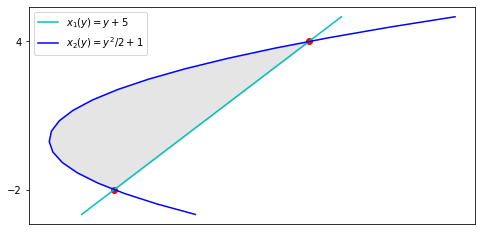

In [56]:
# funciones
y = np.linspace(-3 , 5, 20)
xa = y + 5         # xa(y)  
xb = 1/2*y**2 +1   # xb(y)

# área a calcular 
a, b = -2, 4
y_area = np.linspace(a , b, 20)
xa_area = y_area + 5
xb_area = 1/2*y_area**2 +1 

# grafico
plt.figure(figsize=(8,4))

plt.scatter(9,4,c='r')
plt.scatter(3,-2,c='r')

plt.plot(xa,y, color='c', label='$x_1(y)= y + 5$') 
plt.plot(xb,y, color='b', label='$x_2(y)=  y^2 /2 + 1$') 

plt.fill_betweenx(y_area, xb_area, xa_area, alpha=0.2, color='grey')

plt.legend()
plt.yticks((a, b))
plt.xticks([])

plt.show()      

In [57]:
# Coordenadas polares para una region circular. 

x = symbols('x')
y1 = sqrt(1 - x**2)
y1

sqrt(1 - x**2)

In [58]:
x,y = symbols('x y')

F1 = Integral(1,(y,0,y1))

F2 = Integral(F1,(x,0,1))
F2

Integral(1, (y, 0, sqrt(1 - x**2)), (x, 0, 1))

In [59]:
F2.doit()

pi/4

In [60]:
# cambio de coordenadas y jacobiano 
# se agrega el jacobiano como factor de ajuste debido al cambio de variables.

rho, phi = symbols('rho phi')

X = Matrix([rho*cos(phi), rho*sin(phi)])
X

Matrix([
[rho*cos(phi)],
[rho*sin(phi)]])

In [61]:
Y = Matrix([rho, phi])
J = X.jacobian(Y)
J

Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)]])

In [62]:
det(J).simplify()

rho

In [63]:
rho, phi = symbols('rho phi')

F1 = Integral(rho ,(rho,0,1)) # agregamos el jacobiano

F2 = Integral(F1,(phi,0,pi/2))
F2

Integral(rho, (rho, 0, 1), (phi, 0, pi/2))

In [64]:
F2.doit()

pi/4

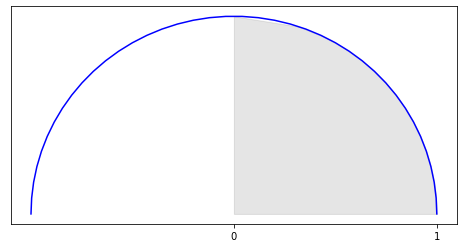

In [65]:
# funciones

t = np.linspace(0,np.pi, 40)
x = np.cos(t)
y = np.sin(t)

# área 
a, b = 0, 1
x_area = np.linspace(a , b, 20)
y_area = np.sqrt(1 - x_area**2)

# grafico
plt.figure(figsize=(8,4))

plt.plot(x,y, color='b') 
plt.fill_between(y_area, 0, x_area, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.yticks([])

plt.show()      

In [66]:
# anillo de elipse 1 < (x/a)^2 + (y/b)^2 < 4

x,y,a,b = symbols('x y a b')

y1 = (b) *sqrt(1 - x**2 / a**2)
y2 = (b) *sqrt(4 - x**2 / a**2)

Fy = Integral(1,(y,y1,y2))
Fx = 2*Integral(Fy,(x,-1,1))

Fx.subs(a,1).subs(b,2)

2*Integral(1, (y, 2*sqrt(1 - x**2), 2*sqrt(4 - x**2)), (x, -1, 1))

In [67]:
# jacobiano para polar elipsoide
a, b, rho, phi = symbols('a b rho phi')

X = Matrix([a*rho*cos(phi), b*rho*sin(phi)])
X

Matrix([
[a*rho*cos(phi)],
[b*rho*sin(phi)]])

In [68]:
Y = Matrix([rho, phi])
J = X.jacobian(Y)
J

Matrix([
[a*cos(phi), -a*rho*sin(phi)],
[b*sin(phi),  b*rho*cos(phi)]])

In [69]:
det(J).simplify()

a*b*rho

In [70]:
# cambio de variables a polares de elipse junto al jacobiano 

rho, phi,a,b = symbols('rho phi a b')

F1 = Integral(a*b*rho ,(rho,1,4)) # agregamos el jacobiano

F2 = Integral(F1,(phi,0,2*pi))
F2

Integral(a*b*rho, (rho, 1, 4), (phi, 0, 2*pi))

In [71]:
A = F2.doit()
A

15*pi*a*b

In [72]:
A.subs(a,1).subs(b,2)

30*pi

In [73]:
N(A.subs(a,1).subs(b,2), 3)

94.3

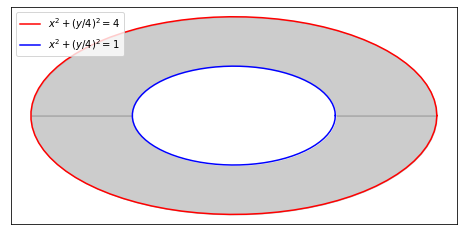

In [74]:
# funciones

t = np.linspace(0,2*np.pi,80)

# (x/1)^2 + (y/4)^2 = 1
xa = np.cos(t)
ya = np.sin(t) * 0.5

# (x/1)^2 + (y/4)^2 = 4
xb = 2* np.cos(t)
yb = 2* np.sin(t) * 0.5

# grafico
plt.figure(figsize=(8,4))

plt.plot(xb,yb, color='r',label='$x^2 + (y/4)^2 = 4$') 
plt.plot(xa,ya, color='b', label='$x^2 + (y/4)^2 = 1$') 

# área
plt.fill_between(xb, 0, yb, alpha=0.4, color='grey')
plt.fill_between(xa, 0, ya, alpha=1, color='w')

plt.legend(loc=2)
plt.xticks([])
plt.yticks([])

plt.show()      

# 5. Integrales triples

Hasta ahora solo se vio el cálculo de áreas de una región definida.

También se puede calcular volúmenes de un sólido.

$\displaystyle \int_{a}^{b} \int_{g(x)}^{f(x)} f(x,y) dy dx $ 

También se puede extender  ...

#### $\displaystyle \iiint_V dV = \int_{a}^{b} \int_{y_2(x)}^{y_1(x)} \int_{z_2 (x,y)}^{z_1(x,y)}  dz dy dx $

El orden de integración depende de las variables usadas para definir la región.

In [75]:
# cubo 
x,y,z = symbols('x y z')

F1 = Integral(1,(z,0,1))
F2 = Integral(F1,(y,0,1))
F3 = Integral(F2,(x,0,1))
F3

Integral(1, (z, 0, 1), (y, 0, 1), (x, 0, 1))

In [76]:
F3.doit()

1

In [77]:
# función f(x,y) límite superior
x,y = symbols('x y')

f= E**(-y**2)
f

exp(-y**2)

In [78]:
F1 = Integral(f,(x,0,y))
F2 = Integral(F1,(y,0,1))
F2

Integral(exp(-y**2), (x, 0, y), (y, 0, 1))

In [79]:
F2.doit()

1/2 - exp(-1)/2

In [80]:
N(F2.doit(), 3)

0.316

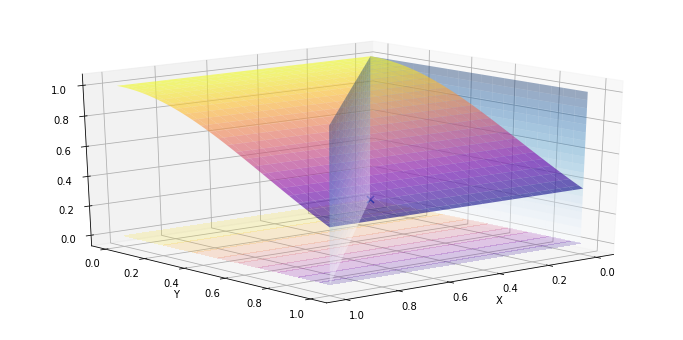

In [81]:
t = np.linspace(0, 1, 50) 
x , y = np.meshgrid(t,t)
z = np.e**(-y**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.6)
cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap=cm.plasma, alpha=0.2)

# x < y
t_p1= np.linspace(0, 1, 20) 
x_p1 , z_p1 = np.meshgrid(t_p1,t_p1)
y_p1 = x_p1
surf = ax.plot_surface(x_p1, y_p1, z_p1, rstride=1, cstride=1, cmap=cm.Blues, alpha=0.4)

# x = 0
t_p2= np.linspace(0, 1, 20) 
y_p2 , z_p2 = np.meshgrid(t_p2,t_p2)
x_p2 = np.zeros(len(y_p2))

surf = ax.plot_surface(x_p2, y_p2, z_p2, rstride=1, cstride=1, cmap=cm.Blues, alpha=0.4)

ax.scatter(0, 0, 0, marker='x', s=50) #(0,0,0)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

ax.view_init(20, 50) # (0,0) plano yz (ang x, elevación)

plt.show()

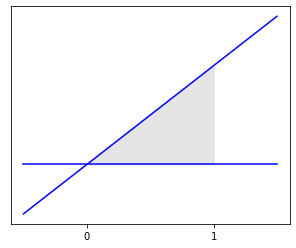

In [82]:
x = np.linspace(-0.5,1.5, 20)
y = x

# región en el plano xy
a, b = 0, 1
x_area = np.linspace(a , b, 20)
yb, ya = x_area, np.zeros(len(x_area))

# gráfico 
plt.figure(figsize=(5,4))

plt.plot(x,y, color='b') 
plt.plot(x,ya, color='b') 

plt.fill_between(x_area, ya,yb, alpha=0.2, color='grey')

plt.xticks((a, b))
plt.yticks([])

plt.show()      

## a. Coordenadas cilíndricas 

In [83]:
# volumen entre el paraboloide elíptico z = x^2 + 4*y^2 y el cilindro x^2 + 4*y^2 = 4 para Z>0 

x,y = symbols('x y')

f = x**2 + 4*y**2
f

x**2 + 4*y**2

In [84]:
F1 = Integral(f,(y,0, (1/2)*sqrt(4 - x**2)))
F2 = 4* Integral(F1,(x,0,2))
F2

4*Integral(x**2 + 4*y**2, (y, 0, 0.5*sqrt(4 - x**2)), (x, 0, 2))

In [85]:
# jacobiano para coordenadas cilíndricas y elípticas 

rho, theta, z = symbols('rho theta z')

X = Matrix([rho*cos(theta), (1/2)*rho*sin(theta), z])
X

Matrix([
[    rho*cos(theta)],
[0.5*rho*sin(theta)],
[                 z]])

In [86]:
Y = Matrix([rho, theta, z])

X.jacobian(Y)

Matrix([
[    cos(theta),    -rho*sin(theta), 0],
[0.5*sin(theta), 0.5*rho*cos(theta), 0],
[             0,                  0, 1]])

In [87]:
# se toma el valor absoluto del jacobiano
det(X.jacobian(Y)).simplify()

0.5*rho

In [88]:
f

x**2 + 4*y**2

In [89]:
# funcion en coordenadas cilndricas
rho, theta, z = symbols('rho theta z')

f.subs(x,rho*cos(theta)).subs(y,(1/2)*rho*sin(theta)).simplify()

1.0*rho**2

In [90]:
F1 = Integral((1/2)*rho,(z,0,rho**2))

F2 = Integral(F1,(rho,0,2)) # paraboloide z = x^2 + 4*y^2 -> z = rho ^2 

F3 = Integral(F2,(theta,0,2*pi)) # giro completo

F3

Integral(0.5*rho, (z, 0, rho**2), (rho, 0, 2), (theta, 0, 2*pi))

In [91]:
F3.doit()

4.0*pi

In [92]:
N(F3.doit(), 3)

12.6

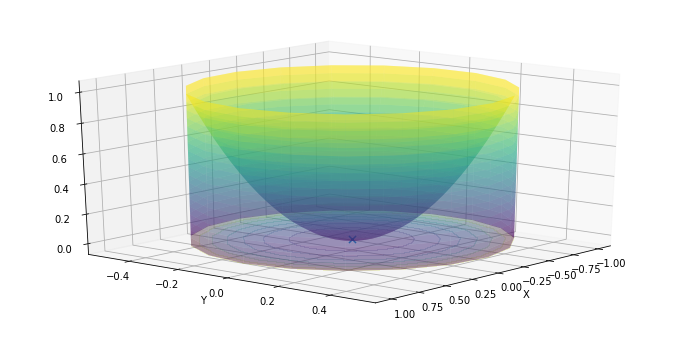

In [93]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

# Paraboloide elíptico

t = np.linspace(0,2*np.pi,20)
r = np.linspace(0,1,20)
theta_p, rho_p = np.meshgrid(t, r)

z1 = rho_p **2

x1 = rho_p*np.cos(theta_p) 
y1 = 0.5*rho_p*np.sin(theta_p)

ax.plot_surface(x1,y1,z1, cmap=cm.viridis, alpha=0.4)
ax.contourf(x1,y1,z1, zdir='z',offset=0, cmap=cm.viridis, alpha=0.2)

# Cilindro elíptico 

z = np.linspace(0, 1 ,20)
theta_c, z2 = np.meshgrid(t, z)

x2 = np.cos(theta_c) 
y2 = 0.5*np.sin(theta_c)

ax.plot_surface(x2,y2,z2, cmap=cm.viridis, alpha=0.4)

ax.scatter(0, 0, 0, marker='x', s=50) #(0,0,0)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.view_init(20, 40) # (0,0) plano yz (ang x, elevación)
plt.show()

## b. Coordenadas esféricas


In [94]:
# Volumen de esfera de radio 1 en el 1er octante

x,y,z = symbols('x y z')

z1 = sqrt(1 -x**2 -y**2)
z1

sqrt(-x**2 - y**2 + 1)

In [95]:
F1 = Integral(1,(z,0,z1))

F2 = Integral(F1,(y,0,sqrt(1- x**2)))

F3 = Integral(F2,(x,0,1))

F3

Integral(1, (z, 0, sqrt(-x**2 - y**2 + 1)), (y, 0, sqrt(1 - x**2)), (x, 0, 1))

In [96]:
# jacobiano para coordenadas esféricas  
# recordemos que theta  es el ángulo desde el eje x en el plano xy (0 < theta < 2*pi)
# mientras que phi es el ángulo desde el eje z(+) hasta el eje z(-) (0 < phi <pi) 

# un ángulo gira respecto al eje z y el otro baja 

rho, phi, theta = symbols('rho phi theta')

X = Matrix([rho*sin(phi)*cos(theta), rho*sin(theta)*sin(phi), rho*cos(phi)])
X

Matrix([
[rho*sin(phi)*cos(theta)],
[rho*sin(phi)*sin(theta)],
[           rho*cos(phi)]])

In [97]:
Y = Matrix([rho, phi, theta])
X.jacobian(Y)

Matrix([
[sin(phi)*cos(theta), rho*cos(phi)*cos(theta), -rho*sin(phi)*sin(theta)],
[sin(phi)*sin(theta), rho*sin(theta)*cos(phi),  rho*sin(phi)*cos(theta)],
[           cos(phi),           -rho*sin(phi),                        0]])

In [98]:
# determinante del jacobiano
# para recordar ... el ángulo que baja esta en el jacobiano
det(X.jacobian(Y)).simplify()

rho**2*sin(phi)

In [99]:
# cambio de coordenadas 
F1 = Integral(sin(phi)*rho**2,(rho,0,1))

# 0 < phi < pi (desde z+ a z-) llega al plano xy en pi/2

F2 = Integral(F1,(phi,0,pi/2))   

# 0 < phi < 2*pi (giro completo) llega al plano yz en pi/2

F3 = Integral(F2,(theta,0,pi/2))

F3

Integral(rho**2*sin(phi), (rho, 0, 1), (phi, 0, pi/2), (theta, 0, pi/2))

In [100]:
F3.doit()

pi/6

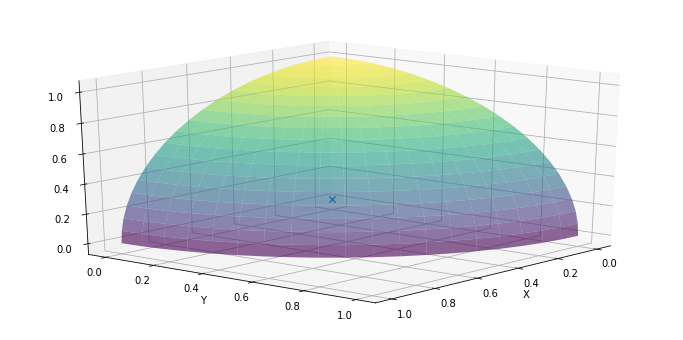

In [101]:
### 1/8 Esfera

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')

rho = 1
phi , theta = np.meshgrid(np.linspace(0,np.pi/2, 20), np.linspace(0,np.pi/2, 20)) 

x1 = np.sin(phi)* np.cos(theta)*rho
y1 = np.sin(phi)* np.sin(theta)*rho
z1 = np.cos(phi)*rho

ax.plot_surface(x1,y1,z1, cmap=cm.viridis, alpha=0.6)

ax.scatter(0,0,0, marker='x', s=40)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.view_init(20, 40)
plt.show()

In [102]:
## ejer casquete esférico entre los radios r = 3 y r =4 para z>0 (1 casquete)
# con corte de cono x^2 + y^2 = z^2

rho, phi, theta = symbols('rho phi theta')

F1 = Integral(sin(phi)*rho**2,(rho,3,4))

F2 = Integral(F1,(phi,0,pi/4)) # y=0 -> x^2 = z^2 -> x=z

F3 = Integral(F2,(theta,0,pi*2)) # giro completo

F3

Integral(rho**2*sin(phi), (rho, 3, 4), (phi, 0, pi/4), (theta, 0, 2*pi))

In [103]:
F3.doit().simplify()

37*pi*(2 - sqrt(2))/3

In [104]:
N(F3.doit() , 3)

22.7

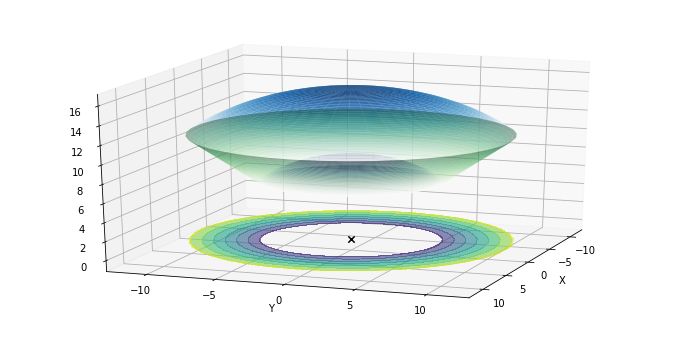

In [105]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')

# ángulos de barrido para las esfera  
phi , theta = np.meshgrid(np.linspace(0,np.pi/4, 40), np.linspace(0,2*np.pi, 40)) 

# esfera r = 4
rho_sup = 16 

x1 = np.sin(phi)* np.cos(theta)*rho_sup
y1 = np.sin(phi)* np.sin(theta)*rho_sup
z1 = np.cos(phi)* rho_sup

ax.plot_surface(x1,y1,z1, cmap=cm.Blues, alpha=0.8)

# esfera r = 3
rho_inf = 9  

x2 = np.sin(phi)* np.cos(theta)*rho_inf
y2 = np.sin(phi)* np.sin(theta)*rho_inf
z2 = np.cos(phi)* rho_inf

ax.plot_surface(x2,y2,z2, cmap=cm.Purples, alpha=0.8)

# cono x^2 + y^2 = z^2

phi_cono = np.pi/4
t = np.linspace(0, 2*np.pi,40)
r = np.linspace(9, 16, 20)

rho_cono , theta_cono = np.meshgrid(r , t)

x3 = np.sin(phi_cono)* np.cos(theta_cono)*rho_cono
y3 = np.sin(phi_cono)* np.sin(theta_cono)*rho_cono
z3 = np.cos(phi_cono)*rho_cono

ax.plot_surface(x3,y3,z3, cmap=cm.Greens, alpha=0.4)
ax.contourf(x3,y3,z3, zdir='z',offset=0, cmap=cm.viridis, alpha=0.6)

ax.scatter(0,0,0, marker='x',c='black', s=40)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(20, 20)
plt.show()

# 6. Aplicaciones 

## a. Geometría

Hasta ahora solo vimos áreas y volumes pero podemos podemos calcular otras magnitudes geométricas para figuras planas y sólidos, las cuales se pueden calcular con integrales.

## 1) Masa 

### Caso lineal  

Para una barra de largo L si su extremo izquierdo coincide con el origen de coordenadas.
Se puede definir su densidad lineal como $\rho = f(x)$

Su masa queda definida como:

$ M = \displaystyle \int_{0}^{L} \rho(x) dx $


### Caso superficial

Para la masa de una lámina delgada, con la densidad superficial $\rho = f(x,y)$ 

$ M =\displaystyle \iint_{R} \rho(x,y) dA $

### Caso volumétrico

Para un sólido en el espacio, con la densidad volumétrica $\rho = f(x,y,z)$


$ M = \displaystyle \iiint_{V} \rho(x,y,z) dV $

$\,$

## 2) Primer momento de área
 
### Momento estático para una lámina

Con los momentos se puede calcular el baricentro de la figura plana.

$ S_x = \iint_{A} x dA  $

$ S_y = \iint_{A} y dA  $

Baricentro de la figura

$ \bar{x} = \displaystyle \frac{S_x}{A} = \frac{\displaystyle \iint_{A} x dA}{\displaystyle \iint_{A}dA} $

$ \bar{y} = \displaystyle \frac{S_y}{A} = \frac{\displaystyle \iint_{A} y dA}{\displaystyle \iint_{A}dA} $

### Momento estático para un sólido

Se puede calcular el baricentro de un volumen, partiendo desde sus momentos respecto a los planos coordenados.

Para el caso tridimensional, se tendra una ecuación para cada eje, en el eje coordenado x:

$ \bar{x} = \frac{ \displaystyle \iiint_{V} x dV}{\displaystyle \iint_{V}dV} $

$\,$

## 3) Segundo momento de área 

Momento de inercia es una propiedad de las áreas planas pero que se aplica a secciones transversales 

Se define para cada eje coordenado y el polar.

$ I_x = \iint_{A} y^2  dA $

$ I_y = \iint_{A} x^2 dA $

$ I_o = \iint_{A} (x^2+ y^2) dA $

Momento centrífugo: 

$ I_{xy} = \iint_{A} xy  dA $

Con los momentos se puede calcular el ángulo para los ejes principales de inercia de una sección.

$\,$

## 4) Momento de inercia de una masa 

Sea un sólido con una densidad volumétrica (distribución de masas) se puede medir su momento de inercia respecto a un eje de giro. Esta magnitud se usa para calcular la energía cinética de un cuerpo en rotación.

Para el eje coordenado x:

$ I_x = \iiint_V r_x dm = \iiint_V (y^2 + z^2) dm = \iiint_V (y^2 + z^2) \rho dV $

El diferencial de masa $dm$ se puede adaptar a la geométria del sólido para facilitar el cálculo. 

Entonces podemos llegar al centro de masas.

Para el eje coordenado x:

$ r_{CM} = \displaystyle \frac{I_x}{M} = \frac{\displaystyle \iiint_V (y^2 + z^2) dV}{\displaystyle \iiint_{V}  dV}$

Si la densidad no es constante ...

$ r_{CM} = \displaystyle \frac{I_x}{M} = \frac{\displaystyle \iiint_V (y^2 + z^2) \rho(x,y,z) dV}{\displaystyle \iiint_{V} \rho(x,y,z) dV}$


Hay que notar que el baricentro de un sólido va a coincidir con su centro de masas cuando la densidad volumentrica es uniforme.

Por ejemplo, una esfera tiene su baricentro en su centro pero si su densidad hace que haya más masa concentrada en una región del volumen, su centro de masa estará ubicado en otro punto diferente del centro.  

## b. Fuerzas distribuidas

Se puede crear un modelo para una carga lineal distribuida sobre una barra.
La carga distribuida puede ser constante en el caso mas simple o estar en funcion del eje longitudinal.

Fuerza resultante es la suma de cada carga sobre la barra :

$ P = \displaystyle \int_{0}^{L} p(x) dx $

Momento resultante respecto al eje x que ejerce la carga sobre la barra:

$ M_x = \displaystyle \int_{0}^{L} x p(x) dx $

Se puede hallar su punto de aplicacion para una fuerza puntual equivalente. 

$ \bar x_p = \frac{M_x}{P} = \frac{\displaystyle \int_{0}^{L} x p(x) dx}{\displaystyle \int_{0}^{L} p(x) dx}   $


Si en vez de una carga lineal se tiene una carga distribuida sobre un área, la fuerza distribuida p(x,y) sobre una superficie tiene una fuerza P y momento M .

La carga distribuida se puede comparar con un solido de carga, un volumen.

$ P_x = \displaystyle \iint_{A} p(x,y) dA = \iiint_V dV $

$ M_x = \displaystyle \iint_{A} x p(x,y) dA = \iiint_V x dV$

Centro de aplicacion de la fuerza resultante.

$ \bar x_p = \frac{M_x}{P_x} = \frac{ \displaystyle \iint_{A} p(x,y) dA}{\displaystyle \iint_{A} x p(x,y) dA}   $

Este es el principio de cálculo para la fuerza que soportan las compuertas sumergidas en líquido en hidrostática.

## c. Estadística

Este campo de estudio es muy amplio pero una forma de resumir uan de sus objetivos es el análisis de datos.  

Si se tiene una función $f(x)$ se llama función de densidad si cumple que:

$f(x) \geq 0$

$ \displaystyle \int_{- \infty}^{+ \infty} f(x) dx = 1$

Se puede hallar su funcion de distribucion acumulativa que es ...


$ F(x) =  \displaystyle\int_{- \infty}^{x} f(t) dt$


Se puede hallar el valor esperado $E(x)$ y la variaza $Var(x)$

$ E(x) = \mu = \displaystyle \int_{- \infty}^{+ \infty}  x f(x) dx$
 

$ Var(x) =\sigma^2 = \displaystyle \int_{- \infty}^{+ \infty} (x - \mu)^2 f(x)  dx$


$\,$

Tambien se puede extender al caso multivariable si se tiene una función $f(x,y), si...$

$f(x,y) \geq 0$

$ \displaystyle \int_{- \infty}^{+ \infty} \int_{- \infty}^{+ \infty} f(x,y) dx dy = 1$

con valor esperado respecto a cada variable 

$ E(x) = \mu_x =\displaystyle \int_{- \infty}^{+ \infty}  x f(x,y) dx dy$

$ E(y) = \mu_y =\displaystyle \int_{- \infty}^{+ \infty}  y f(x,y) dx dy$

y con covarianza 

$ \sigma_{xy} = \displaystyle \int_{- \infty}^{+ \infty} \int_{- \infty}^{+ \infty}(x- \mu_x)(y- \mu_y) f(x,y)  dx dy$

# 7. Linealidad

Para terminar quiero mencionar la aplicación lineal que tienen la derivación y la integración, es decir que ambas operaciones son transformaciones lineales.

Linealidad en derivadas

$\displaystyle \frac{df(\lambda x)}{dx} = \lambda \frac{df(x)}{dx} $

$ \displaystyle \frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) $

$\,$

Linealidad en integrales

$\displaystyle \int \lambda f(x) dx = \lambda \int  f(x) dx $

$\displaystyle \int f(x) + g(x) dx = \int f(x) dx + \int g(x) dx $
